In [170]:
import numpy as np
import pandas as pd
import FinanceDataReader as fdr
import talib.abstract as ta
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [171]:
# 삼성전자 
samsung_raw = fdr.DataReader('005930', '2018')
samsung_raw.columns=['open','high','low','close', 'volume', 'change']
# 코스피지수
kospi_raw = fdr.DataReader('KS11', '2018')
kospi_raw.columns=['open','high','low','close', 'volume', 'change']

In [172]:
samsung = samsung_raw

# 기간별 삼성전자 종가 이동평균 계산
samsung['ma5'] = ta.MA(samsung_raw, timeperiod=5)
samsung['ma10'] = ta.MA(samsung_raw, timeperiod=10)
samsung['ma20'] = ta.MA(samsung_raw, timeperiod=20)
samsung['ma60'] = ta.MA(samsung_raw, timeperiod=60)
samsung['ma120'] = ta.MA(samsung_raw, timeperiod=120)

# 기간별 코스피지수 종가 이동평균 계산
samsung['kospi_ma5'] = ta.MA(kospi_raw, timeperiod=5)
samsung['kospi_ma10'] = ta.MA(kospi_raw, timeperiod=10)
samsung['kospi_ma20'] = ta.MA(kospi_raw, timeperiod=20)
samsung['kospi_ma60'] = ta.MA(kospi_raw, timeperiod=60)
samsung['kospi_ma120'] = ta.MA(kospi_raw, timeperiod=120)

# 볼린저 밴드
samsung['upperband'], samsung['middleband'], samsung['lowerband'] = \
ta.BBANDS(samsung_raw.close)

### train / test split

In [173]:
samsung_train = samsung['2019-01-02':'2019-12-30']
samsung_train.describe()

,open,high,low,close,volume,change,ma5,ma10,ma20,ma60,ma120,kospi_ma5,kospi_ma10,kospi_ma20,kospi_ma60,kospi_ma120,upperband,middleband,lowerband
count,246.000000,246.000000,246.000000,246.000000,2.460000e+02,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.00000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,46563.414634,46989.024390,46122.154472,46583.333333,1.089653e+07,0.001593,46442.317073,46269.044715,45974.014228,45192.818428,44695.569106,2094.44900,2092.980858,2091.221691,2088.160921,2106.053129,47569.464638,46442.317073,45315.169509
std,3799.192036,3788.349684,3773.149909,3776.215397,4.095583e+06,0.014517,3698.351304,3595.503939,3400.952705,2519.799633,1485.351045,76.82408,74.194206,68.873925,53.042514,38.998252,3783.820731,3698.351304,3691.159267
min,37450.000000,37600.000000,36850.000000,37450.000000,4.406531e+06,-0.040678,38130.000000,38340.000000,38905.000000,41337.500000,43120.000000,1915.72400,1922.012000,1930.280000,2003.784333,2040.231250,39019.888875,38130.000000,36713.809595
25%,44012.500000,44362.500000,43650.000000,44000.000000,8.045918e+06,-0.007418,44055.000000,44010.000000,44070.625000,44284.583333,43463.541667,2050.85250,2048.558250,2050.640500,2048.037458,2064.371042,44880.998508,44055.000000,43123.997794
50%,46000.000000,46375.000000,45475.000000,46025.000000,9.871402e+06,0.001120,45800.000000,45785.000000,45506.250000,44890.833333,44544.375000,2090.51800,2090.493500,2094.607000,2085.179000,2122.595875,47014.644087,45800.000000,44638.304929
75%,48762.500000,49237.500000,48487.500000,49012.500000,1.259267e+07,0.010540,48582.500000,48542.500000,47311.875000,45768.125000,45182.916667,2154.47850,2151.500750,2149.961500,2127.841625,2134.218021,49606.340381,48582.500000,47409.954470
max,57000.000000,57300.000000,56000.000000,56700.000000,2.917870e+07,0.040863,56100.000000,55790.000000,53507.500000,51965.000000,48888.750000,2229.61600,2219.730000,2205.629000,2184.248667,2180.276333,57597.966639,56100.000000,55310.063294


In [174]:
samsung.columns

Index(['open', 'high', 'low', 'close', 'volume', 'change', 'ma5', 'ma10',
       'ma20', 'ma60', 'ma120', 'kospi_ma5', 'kospi_ma10', 'kospi_ma20',
       'kospi_ma60', 'kospi_ma120', 'upperband', 'middleband', 'lowerband'],
      dtype='object')

In [244]:
# samsung_test = samsung_raw['2019-12-30':'2020-03-31']
samsung_test = samsung_raw['2019-12-30':]
samsung_test.describe()

,open,high,low,close,volume,change,ma5,ma10,ma20,ma60,ma120,kospi_ma5,kospi_ma10,kospi_ma20,kospi_ma60,kospi_ma120,upperband,middleband,lowerband
count,199.000000,199.000000,199.000000,199.000000,1.990000e+02,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,54712.060302,55343.216080,54031.909548,54657.788945,2.170566e+07,0.000604,54612.663317,54556.030151,54416.645729,53800.628141,52825.247069,2108.263357,2106.044734,2100.955394,2076.578250,2050.913902,56360.092744,54612.663317,52865.233889
std,4523.926881,4470.463301,4575.593947,4527.425087,9.474400e+06,0.021427,4378.758119,4204.804860,3907.268095,2621.057733,1281.861108,214.632336,209.087561,198.029229,141.105423,54.803866,4388.388812,4378.758119,4593.154543
min,42600.000000,43550.000000,42300.000000,42500.000000,8.356767e+06,-0.063877,44680.000000,46330.000000,47210.000000,49118.333333,48888.750000,1492.824000,1575.467000,1653.670000,1834.274333,1984.885250,48057.928359,44680.000000,40615.216583
25%,50800.000000,51300.000000,49875.000000,50350.000000,1.546291e+07,-0.011564,50190.000000,50390.000000,51025.000000,51597.916667,52146.041667,1976.431000,1963.724000,1957.510250,1956.479417,1998.045417,52070.381398,50190.000000,48969.592558
50%,55300.000000,55900.000000,54600.000000,55400.000000,1.889932e+07,0.001848,55400.000000,55480.000000,54980.000000,54195.000000,53251.666667,2157.318000,2160.380000,2145.099500,2113.025500,2044.534250,56803.650411,55400.000000,53482.576169
75%,58750.000000,59350.000000,57800.000000,58650.000000,2.483682e+07,0.011312,58300.000000,58170.000000,57682.500000,56067.916667,53808.750000,2257.425000,2236.322500,2206.981000,2161.319833,2092.729792,60113.072231,58300.000000,56719.499399
max,62000.000000,62800.000000,61700.000000,62400.000000,5.946293e+07,0.104706,61640.000000,60740.000000,60045.000000,57905.000000,54815.000000,2411.908000,2396.203000,2370.277500,2330.124333,2194.594583,63761.755137,61640.000000,60409.715480


In [245]:
len(samsung_test)

199

In [246]:
# 정규화
def StandardScaling(df):    
    scaler = StandardScaler()

    df_scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(df_scaled)
    df_scaled.columns = df.columns
    df_scaled.index = df.index

    return df_scaled

In [247]:
samsung_train_scaled = StandardScaling(samsung_train)
samsung_test_scaled = StandardScaling(samsung_test)

In [248]:
# window_size split
def make_dataset(data, label, window_size):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [249]:
cols = samsung_train_scaled.columns
feature_cols = cols.drop('close')
label_cols = ['close']

train_feature = samsung_train_scaled[feature_cols]
train_label = samsung_train_scaled[label_cols]
test_feature = samsung_test_scaled[feature_cols]
test_label = samsung_test_scaled[label_cols]

# train dataset
x_train, y_train = make_dataset(train_feature, train_label, 1)
# test dataset
x_test, y_test = make_dataset(test_feature, test_label, 1)

In [250]:
# temp
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((245, 1, 18), (198, 1, 18), (245, 1), (198, 1))

In [251]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(
                 units = 16
#                , input_length=x_train.shape[1]
#                , input_dim=x_train.shape[2]
               , input_shape=(x_train.shape[1], x_train.shape[2])
               , activation='relu'
               , return_sequences=False
              )
          )
model.add(Dense(1))

In [252]:
import os

In [253]:
model.compile(loss='mean_squared_error', optimizer='adam')
# early_stop = EarlyStopping(monitor='val_loss', patience=30)
filename = os.path.join('./sample/', 'LSTM_model.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=16,
                    validation_split=0.2,
                    callbacks=[checkpoint])
#                     callbacks=[early_stop, checkpoint])

Train on 196 samples, validate on 49 samples
Epoch 1/200
196/196 [==============================] - 0s 1ms/step - loss: 0.4924 - val_loss: 2.6582

Epoch 00001: val_loss improved from inf to 2.65819, saving model to ./sample/LSTM_model.h5
Epoch 2/200
196/196 [==============================] - 0s 90us/step - loss: 0.3776 - val_loss: 1.9792

Epoch 00002: val_loss improved from 2.65819 to 1.97923, saving model to ./sample/LSTM_model.h5
Epoch 3/200
196/196 [==============================] - 0s 91us/step - loss: 0.2595 - val_loss: 1.4284

Epoch 00003: val_loss improved from 1.97923 to 1.42837, saving model to ./sample/LSTM_model.h5
Epoch 4/200
196/196 [==============================] - 0s 90us/step - loss: 0.1482 - val_loss: 0.9647

Epoch 00004: val_loss improved from 1.42837 to 0.96468, saving model to ./sample/LSTM_model.h5
Epoch 5/200
196/196 [==============================] - 0s 92us/step - loss: 0.0817 - val_loss: 0.6168

Epoch 00005: val_loss improved from 0.96468 to 0.61683, saving mo

196/196 [==============================] - 0s 97us/step - loss: 0.0287 - val_loss: 0.3327

Epoch 00051: val_loss did not improve from 0.07402
Epoch 52/200
196/196 [==============================] - 0s 92us/step - loss: 0.0269 - val_loss: 0.3256

Epoch 00052: val_loss did not improve from 0.07402
Epoch 53/200
196/196 [==============================] - 0s 87us/step - loss: 0.0269 - val_loss: 0.3376

Epoch 00053: val_loss did not improve from 0.07402
Epoch 54/200
196/196 [==============================] - 0s 92us/step - loss: 0.0269 - val_loss: 0.3607

Epoch 00054: val_loss did not improve from 0.07402
Epoch 55/200
196/196 [==============================] - 0s 92us/step - loss: 0.0264 - val_loss: 0.3441

Epoch 00055: val_loss did not improve from 0.07402
Epoch 56/200
196/196 [==============================] - 0s 92us/step - loss: 0.0271 - val_loss: 0.3594

Epoch 00056: val_loss did not improve from 0.07402
Epoch 57/200
196/196 [==============================] - 0s 92us/step - loss: 0.0268

196/196 [==============================] - 0s 92us/step - loss: 0.0231 - val_loss: 0.5287

Epoch 00104: val_loss did not improve from 0.07402
Epoch 105/200
196/196 [==============================] - 0s 87us/step - loss: 0.0236 - val_loss: 0.5012

Epoch 00105: val_loss did not improve from 0.07402
Epoch 106/200
196/196 [==============================] - 0s 92us/step - loss: 0.0246 - val_loss: 0.4904

Epoch 00106: val_loss did not improve from 0.07402
Epoch 107/200
196/196 [==============================] - 0s 87us/step - loss: 0.0236 - val_loss: 0.5770

Epoch 00107: val_loss did not improve from 0.07402
Epoch 108/200
196/196 [==============================] - 0s 92us/step - loss: 0.0230 - val_loss: 0.5411

Epoch 00108: val_loss did not improve from 0.07402
Epoch 109/200
196/196 [==============================] - 0s 92us/step - loss: 0.0230 - val_loss: 0.5209

Epoch 00109: val_loss did not improve from 0.07402
Epoch 110/200
196/196 [==============================] - 0s 92us/step - loss: 


Epoch 00156: val_loss did not improve from 0.07402
Epoch 157/200
196/196 [==============================] - 0s 92us/step - loss: 0.0207 - val_loss: 0.6017

Epoch 00157: val_loss did not improve from 0.07402
Epoch 158/200
196/196 [==============================] - 0s 92us/step - loss: 0.0199 - val_loss: 0.6388

Epoch 00158: val_loss did not improve from 0.07402
Epoch 159/200
196/196 [==============================] - 0s 92us/step - loss: 0.0201 - val_loss: 0.6494

Epoch 00159: val_loss did not improve from 0.07402
Epoch 160/200
196/196 [==============================] - 0s 92us/step - loss: 0.0201 - val_loss: 0.6426

Epoch 00160: val_loss did not improve from 0.07402
Epoch 161/200
196/196 [==============================] - 0s 87us/step - loss: 0.0199 - val_loss: 0.6331

Epoch 00161: val_loss did not improve from 0.07402
Epoch 162/200
196/196 [==============================] - 0s 87us/step - loss: 0.0199 - val_loss: 0.6859

Epoch 00162: val_loss did not improve from 0.07402
Epoch 163/20

In [254]:
# weight 로딩
model.load_weights('./sample/LSTM_model.h5')

# 예측
pred = model.predict(x_test)

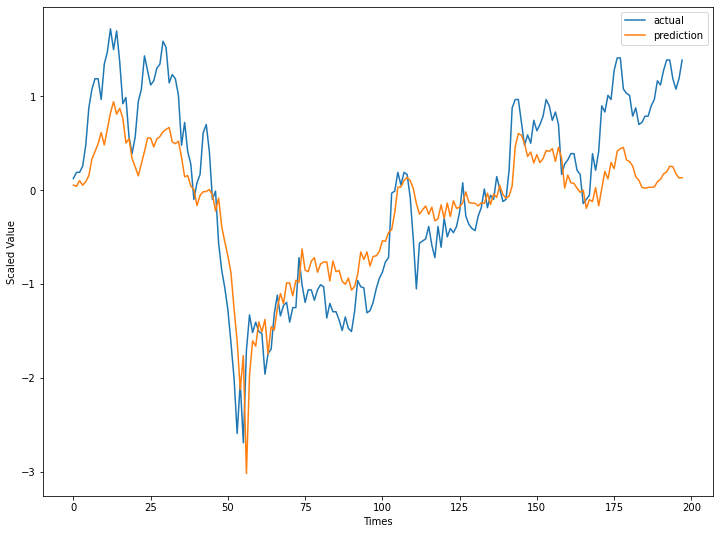

In [255]:
# 시각화
plt.figure(figsize=(12, 9))
plt.plot(y_test, label='actual')
plt.plot(pred, label='prediction')
plt.xlabel('Times')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()

In [256]:
df = pd.DataFrame(pred, columns=['pred'])
df['test_label'] = y_test

In [257]:
df.corr()

,pred,test_label
pred,1.000000,0.904267
test_label,0.904267,1.000000


In [258]:
# callback , modelsave

# gradient boost 돌려서 잘나온 종목을 최종 강화학습할 종목선정하는 것 고려

In [259]:
len(pred), len(test_label)

(198, 199)

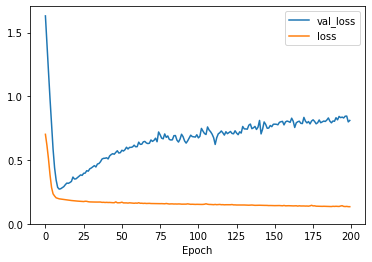

In [302]:
loss_history = pd.DataFrame(history.history).pow(.5)
# loss_history.columns=['Training RMSE', 'Validation RMSE']
loss_history.plot()#logy=True, lw=2)
plt.xlabel('Epoch')
plt.legend()
plt.yticks(np.arange(0.0,2.0,0.5))
plt.show()

In [263]:
loss_history

,val_loss,loss
0,1.630394,0.701731
1,1.406853,0.614462
2,1.195146,0.509366
3,0.982180,0.384974
4,0.785386,0.285844
...,...,...
195,0.829952,0.136364
196,0.843845,0.135369
197,0.844704,0.136524
198,0.799095,0.134429


In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 16)                2240      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [303]:
from sklearn.metrics import r2_score
r2_y_predict = r2_score(y_test, pred)
print(r2_y_predict)

0.7181217712120662


In [304]:
from sklearn.metrics import mean_squared_error
def RMSE(y_test, pred):
    return np.sqrt(mean_squared_error(y_test, pred))
print(RMSE(y_test,pred))

0.5321750900346814
